In [1]:
# Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Data/water_potability.csv")
df1 = df.dropna()

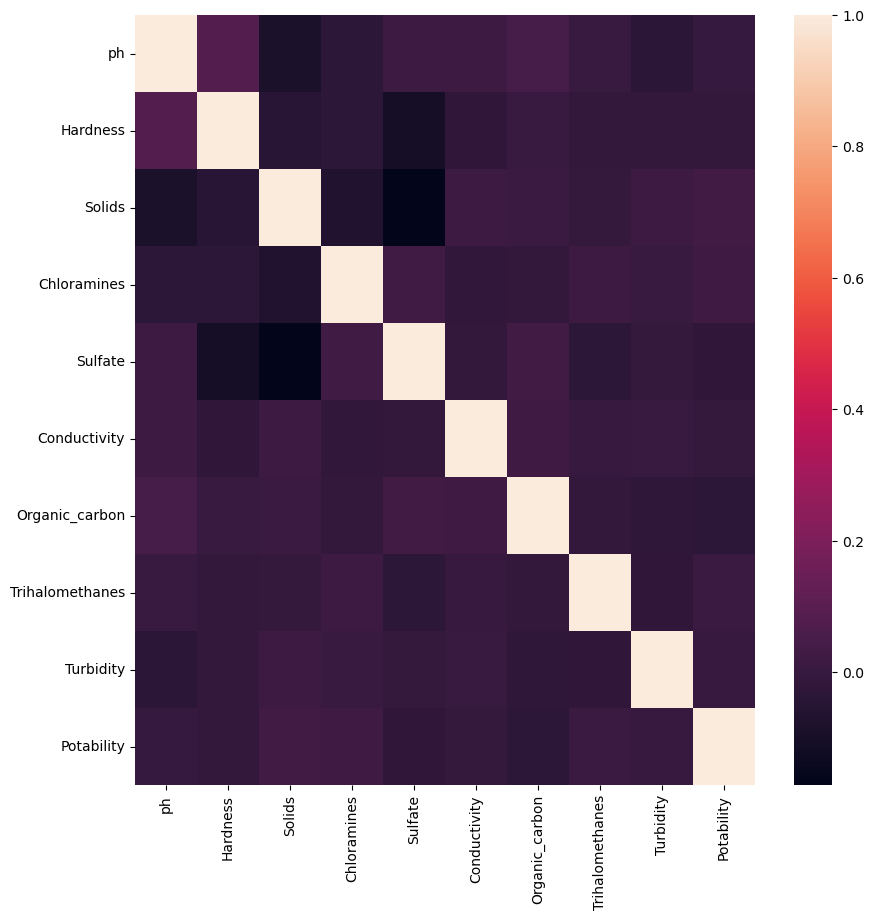

In [3]:
corrmat = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat);

In [24]:
test_size = 0.3
data_x = df1.drop(columns={"Potability"})
#data_x = df1[["ph", "Hardness", "Solids", "Sulfate"]]
#data_x = df1[["ph", "Hardness"]]
data_y = df1[["Potability"]]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=test_size, random_state=42)

# DT

In [26]:
DT = DecisionTreeClassifier(max_depth=5)
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [27]:
y_pred_train = DT.predict(x_train)
y_pred_test = DT.predict(x_test)

In [28]:
print(confusion_matrix(y_train, y_pred_train))
print(f1_score(y_train, y_pred_train))

[[777  68]
 [345 217]]
0.512396694214876


In [29]:
df2 = df1.copy()
df2["Predict"] = DT.predict(data_x)
df2.to_csv("Water_prediction.csv")

# RF

In [30]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=5)
RF.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5)

In [31]:
y_pred_train = RF.predict(x_train)
y_pred_test = RF.predict(x_test)

In [32]:
print(confusion_matrix(y_train, y_pred_train))
print(f1_score(y_train, y_pred_train))

[[844   1]
 [407 155]]
0.4317548746518106


In [33]:
df2 = df1.copy()
df2["Predict"] = RF.predict(data_x)
df2.to_csv("Water_prediction_RF.csv")